**For easy visualization, and to show how complicated data distributed**

**Import dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import train_test_split
from sklearn.manifold import TSNE

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Pipelining**

there are  5087  rows before cleaning



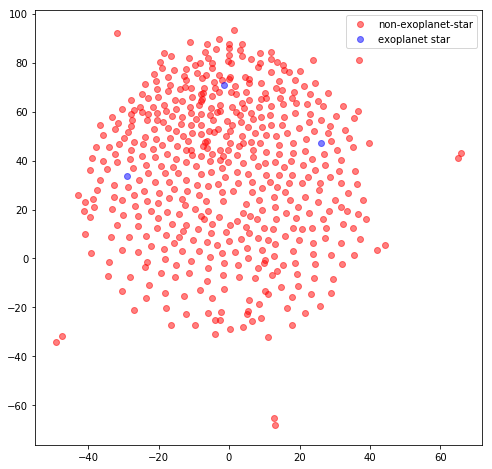

In [2]:
# data location
data_location = '../input/exoTrain.csv'

plt.figure(figsize=(8,8))

color = ['r', 'b', 'g', 'm', 'y', 'c']

percentage_for_test = 0.1

standardization = True

normalization = True

use_pca = False

decompose = PCA if use_pca else TSNE

unique_label = ['non-exoplanet-star', 'exoplanet star']

dataset = pd.read_csv(data_location)
rows = dataset.shape[0]
print ("there are ", rows, " rows before cleaning\n")

dataset = dataset.ix[:, 1:].values

x = dataset[: , 1:]
y = dataset[: , :1]

y = y[:, 0]

_, x, _, y = train_test_split(x, y, test_size = percentage_for_test)

data_visual = decompose(n_components = 2).fit_transform(x)

if standardization:
	x = StandardScaler().fit_transform(x)
	
if normalization:
	x = Normalizer().fit_transform(x)
	
for no, val in enumerate(np.unique(y)):
	plt.scatter(data_visual[y == val, 0], data_visual[y == val, 1], c = color[no], label = unique_label[no], alpha=0.5)

plt.legend()
plt.show()

**This one is hard to predict, but I will try**